# Exercici 2
Fes les tasques de preprocessat  i adequació del Dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA amb l'objectiu de preparar-lo i treballar-lo com a dataframe per a extreure'n informació.

->PRE-PROCESSING-DATA/movies.dat

 **Important**

* El resultat final ha de ser un dataframe amb les variables de nom de la pel·lícula, any i genere. També és important quedar-se amb un sol gènere per a cada pel·lícula!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movies= pd.read_csv('https://raw.githubusercontent.com/BIDDL3/PRE-PROCESSING-DATA/main/movies.dat',
                      header = None,
                      sep = "::",
                      names= ['id', 'title', 'genre'],
                      engine = 'python',
                      encoding = "ISO-8859-1")

In [3]:
movies

,id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [4]:
#Extraemos el año 
movies['year'] = movies['title'].str.extract('\((\d{4})\)')
#Ahora se elimina el año con los parentesis
movies['title'] = movies['title'].str.replace('\s*\(\d{4}\)', '', regex=True)
movies

,id,title,genre,year
0,1,Toy Story,Animation|Children's|Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama,1995
4,5,Father of the Bride Part II,Comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents,Comedy,2000
3879,3949,Requiem for a Dream,Drama,2000
3880,3950,Tigerland,Drama,2000
3881,3951,Two Family House,Drama,2000


In [5]:
#Como nos dice que solo quieren el nombre de la pelicula, año y genero, eliminaremos la columna id
movies =movies.drop('id',axis=1)

**També és important quedar-se amb un sol gènere per a cada pel·lícula!**
* Como no nos dan un criterio para elegir que genero mantener se hara de forma aleatoria

In [6]:
#Primero separamos los valores del genero para que nos quede una lista en cada columna 
movies.genre = movies.genre.str.split('|')
movies

,title,genre,year
0,Toy Story,"[Animation, Children's, Comedy]",1995
1,Jumanji,"[Adventure, Children's, Fantasy]",1995
2,Grumpier Old Men,"[Comedy, Romance]",1995
3,Waiting to Exhale,"[Comedy, Drama]",1995
4,Father of the Bride Part II,[Comedy],1995
...,...,...,...
3878,Meet the Parents,[Comedy],2000
3879,Requiem for a Dream,[Drama],2000
3880,Tigerland,[Drama],2000
3881,Two Family House,[Drama],2000


In [7]:
import random
#Ahora, aplicamos una función en cada fila que seleccione de manera aleatoria algún valor de esa lista
movies['genre'] = movies['genre'].apply(lambda x: random.choice(x))  
movies

,title,genre,year
0,Toy Story,Animation,1995
1,Jumanji,Fantasy,1995
2,Grumpier Old Men,Romance,1995
3,Waiting to Exhale,Drama,1995
4,Father of the Bride Part II,Comedy,1995
...,...,...,...
3878,Meet the Parents,Comedy,2000
3879,Requiem for a Dream,Drama,2000
3880,Tigerland,Drama,2000
3881,Two Family House,Drama,2000


## Pre procesado (verificar valores nulo, duplicados, tipos de datos...etc)

In [8]:
# Nulos
movies.isna().sum()

title    0
genre    0
year     0
dtype: int64

In [9]:
movies.duplicated().sum()

0

In [10]:
movies.loc[movies.duplicated()]

,title,genre,year


In [11]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   3883 non-null   object
 1   genre   3883 non-null   object
 2   year    3883 non-null   object
dtypes: object(3)
memory usage: 91.1+ KB


In [12]:
#Hacemos un CAST del year a numerico
movies.year = movies.year.astype(int)

In [13]:
movies.year.dtype

dtype('int32')

> **El dataFrame ya esta listo para trabajar.**

# Exercici 3

Mostra la teva creativitat. Què creus rellevant mostrar del Dataset "movies.dat" de l'exercici anterior?

Fes una o dues representacions gràfiques i justifica la teva elecció.

Text(0.5, 1.0, 'Movies by Year')

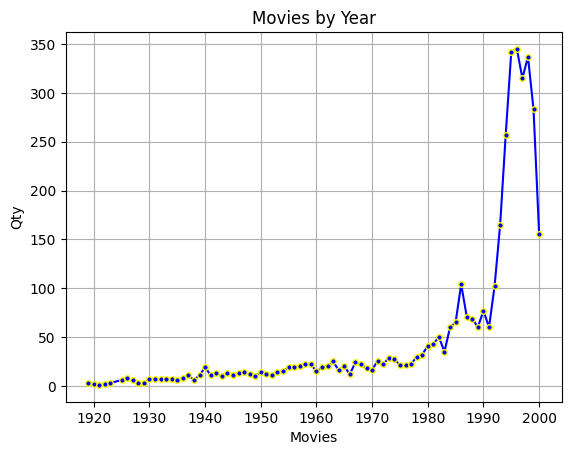

In [14]:
plt.plot(movies.groupby('year').size(),'o-b', ms = 4,mec = 'yellow')
plt.xlabel('Movies')
plt.ylabel('Qty')
plt.grid(True)
plt.title('Movies by Year')


> He elegido gráficar la producción de películas por año mediante un gráfico de líneas,
esto permite observar la tendencia de una forma visual a lo largo del tiempo. A finales de los 90's empieza a disminuir la producción de películas.

In [15]:
movies.genre.unique()

array(['Animation', 'Fantasy', 'Romance', 'Drama', 'Comedy', 'Crime',
       "Children's", 'Action', 'Adventure', 'Thriller', 'Documentary',
       'War', 'Musical', 'Sci-Fi', 'Horror', 'Western', 'Film-Noir',
       'Mystery'], dtype=object)

In [16]:
movies.groupby(['genre', 'year']).size()

genre    year
Action   1919    1
         1921    1
         1951    1
         1952    1
         1953    2
                ..
Western  1992    1
         1993    2
         1994    3
         1995    4
         1998    1
Length: 714, dtype: int64

### Me parece interesante observar por separado la producción de películas por genero por año, para esto usaremos la líbrería de seaborn y gráficos de barras. 

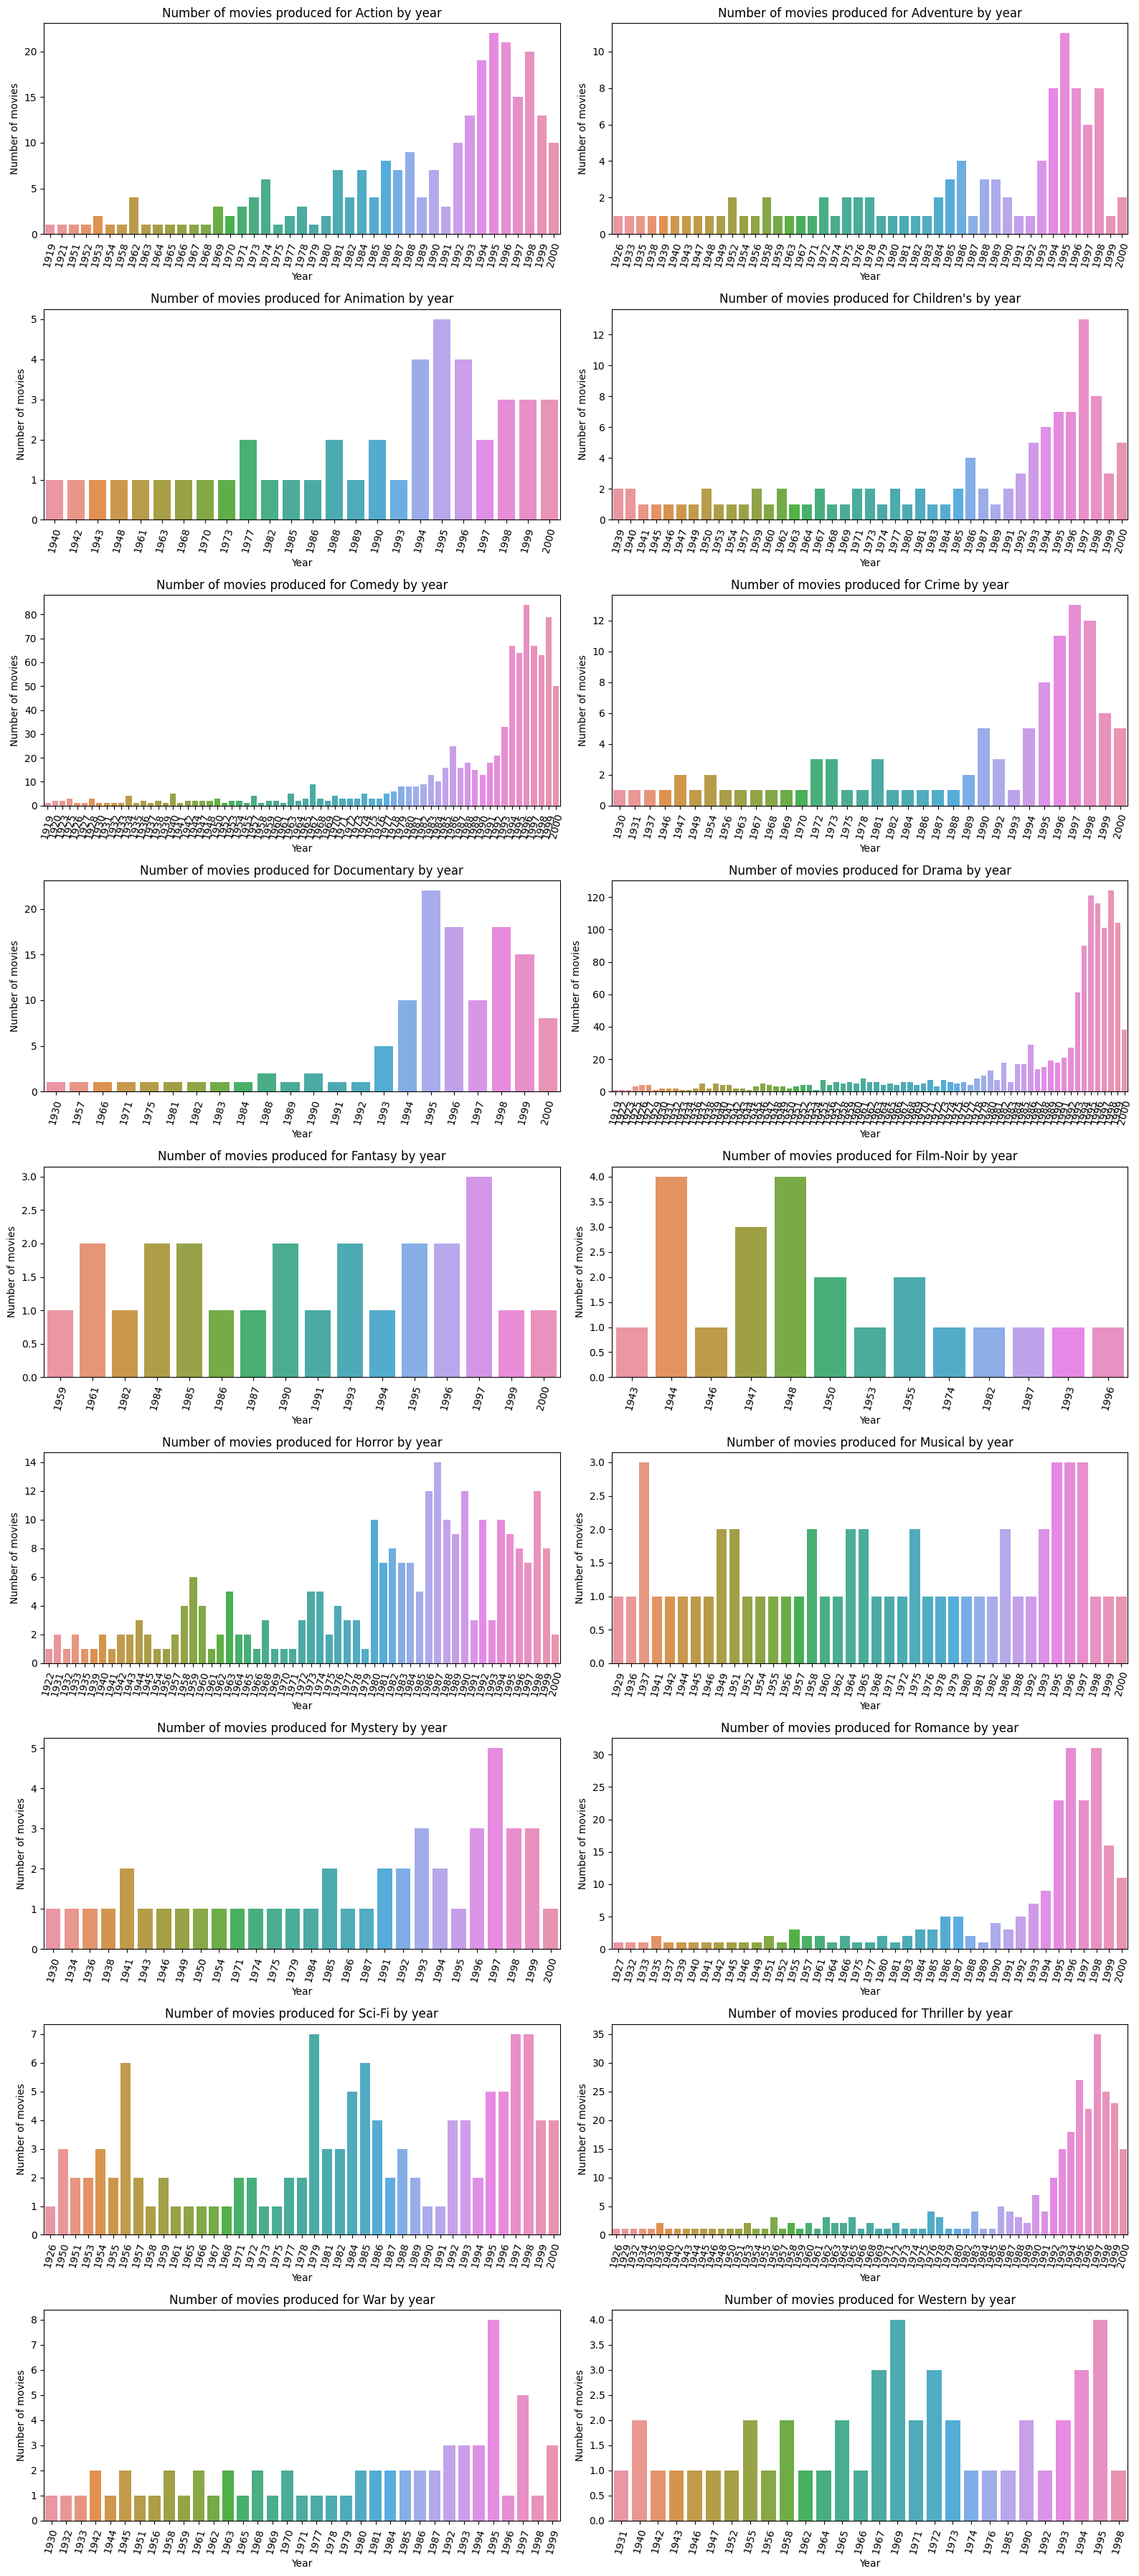

In [17]:
# df con genre y qty por año
movies_grouped = movies.groupby(['genre', 'year']).size().reset_index(name='count')

genres = movies_grouped['genre'].unique() #generos

# Obtener el número de filas necesario para que queden en los dos ejes
n_rows = (len(genres) + 1) // 2

# Crear los ax
fig, axes = plt.subplots(n_rows, 2, figsize=(16, n_rows*4))

# ejes
axes = axes.flatten()

# ciclo para crear las gráficos
for i, (genre, ax) in enumerate(zip(genres, axes)):
    # Filtrar los datos para el género actual
    genre_data = movies_grouped[movies_grouped['genre'] == genre]

    # Crear un gráfico de barras con Seaborn
    sns.barplot(x='year', y='count', data=genre_data, ax=ax)

    # Agregar etiquetas y título al gráfico
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of movies')
    ax.set_title(f'Number of movies produced for {genre} by year')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=75)

# Ajustar la separación entre subplots y mostrar el gráfico
plt.tight_layout()
plt.show()



Conclusiones:
* Las gráficas por género muestran la misma tendencia que la gráfica anterior(movies by year), a finales de los años 90 la producción disminuyo.
* Importante recordar que estas gráficas provienen de una limpieza previa, en el cuál de forma aleatoria se eligio el género. Esto definitivamente afecta  los resultados.
*  Las películas de Acción, Misterio, Comedia, Romance, Thriller siguen una distribución sesgada da la izquierda. (La imagen siguiente muestra esta distribución).
  

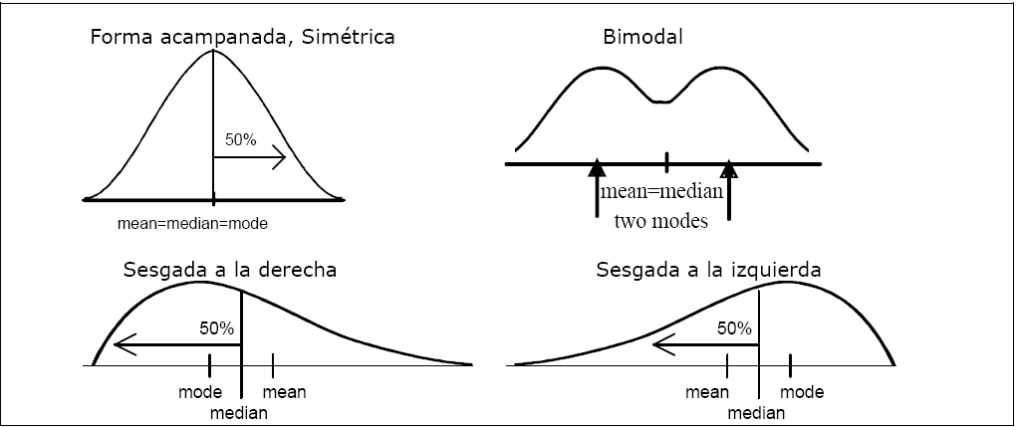

In [18]:
from IPython.display import Image
Image(filename='sesgos_distribucion.png')

## Media de producción por año por genero
Para observar la media de producción y sus outliers utilizaremos un boxplot.

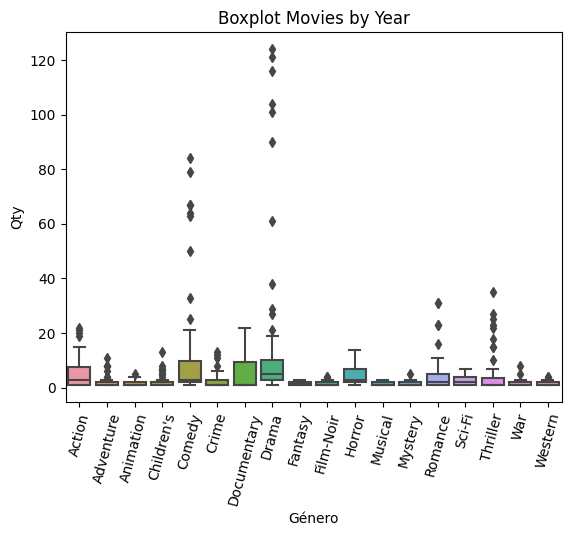

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar datos
grouped_data = movies.groupby(['genre', 'year']).size().reset_index(name='count')

# Crear el boxplot
sns.boxplot(x='genre', y='count', data=grouped_data)
plt.title('Boxplot Movies by Year')
plt.xlabel('Género')
plt.ylabel('Qty')
plt.xticks(rotation=75)
plt.show()



# Observaciones del boxplot: 

* En el boxplot se observa el 75% de los valores de todos los generos no superan las 15 películas.
* La media de producción de películas por año es inferior a las 15 películas. 
* En los últimos años han habido mayores producciones de películas y en el boxplot los podemos observar como outliers. Por ejemplo, en el género drama hay años con producciones de películas altos comparados a la media, llegando a producir 120 películas en un año.